In [4]:
from drawing import draw_dot
from typing import Optional
from micrograd import engine
import numpy as np

In [5]:
class Value(engine.Value):
    def __init__(self, *args, **kwargs) -> None:
        
        def try_get_engine_value() -> Optional[engine.Value]:
            values = list(filter(
                lambda x: isinstance(x, engine.Value), args
            ))
            return values[0] if values else None
        
        engine_value = try_get_engine_value()
        if engine_value:
            self.__dict__ = engine_value.__dict__
        else:
            super(Value, self).__init__(*args, **kwargs)
        
    def exp(self):
        out = Value(data = np.exp(self.data), _children = (self,), _op = 'exp')
        
        def _backward():
            self.grad = np.exp(self.data) * out.grad
        
        out._backward = _backward
        return out
    
    def tanh(self):
        tanh_value = (
            (np.exp(self.data) - np.exp(-self.data)) / (np.exp(self.data) + np.exp(-self.data))
        )
        out = Value(data = tanh_value, _children = (self, ), _op = "tanh")
        
        def _backward():
            self.grad = out.grad
            cosh = (np.exp(self.data) + np.exp(-self.data)) / 2
            self.grad *= 1 / cosh**2
            
        out._backward = _backward
        return out

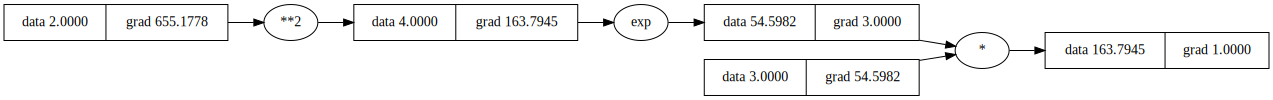

In [6]:
x = Value(2)
y = Value(x**2).exp() * 3

y.backward()
draw_dot(y)

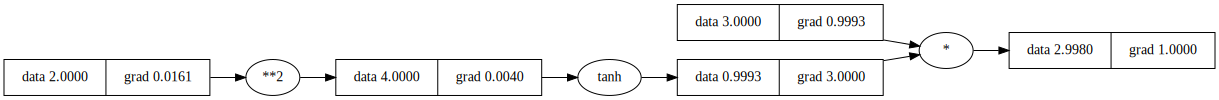

In [7]:
x = Value(2)
y = Value(x**2).tanh() * 3

y.backward()
draw_dot(y)